## Employee Attrition


In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



In [6]:
# Load the dataset
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')



In [7]:
# 1. Preprocess the categorical columns using Label Encoding
label_encoder = LabelEncoder()

data['Attrition'] = label_encoder.fit_transform(data['Attrition'])  # Yes=1, No=0
data['BusinessTravel'] = label_encoder.fit_transform(data['BusinessTravel'])
data['Department'] = label_encoder.fit_transform(data['Department'])



In [8]:
# Define features and target variable
X = data[['Age', 'BusinessTravel', 'Department', 'DailyRate', 'Education']]  # Features
y = data['Attrition']  # Target

# 2. Split the data using stratified splitting to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# 3. Train the SVM Classifier with linear kernel and C=1
svm_model = SVC(kernel='linear', C=1, probability=True)  # probability=True for ROC curve
svm_model.fit(X_train, y_train)


SVC(C=1, kernel='linear', probability=True)

In [9]:

# 4. Predict on the test data
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]  # For ROC curve

# 5. Evaluate the model based on Accuracy, Precision, Recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)



Accuracy: 0.8390022675736961
Precision: 1.0
Recall: 0.0
F1 Score: 0.0


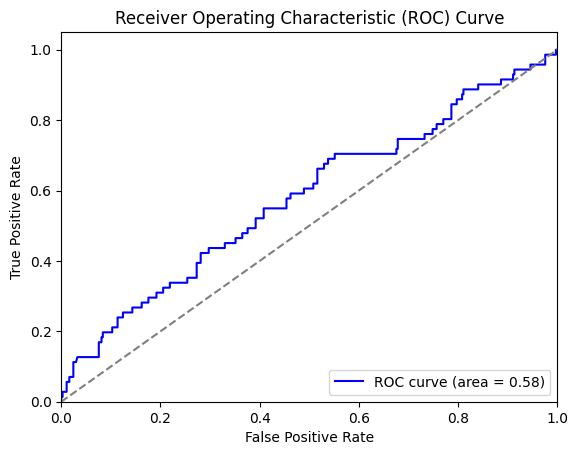

ROC AUC Score: 0.5797297297297296


In [13]:
# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# 6. Plot the ROC curve if both classes are present in y_test
if len(set(y_test)) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    print(f"ROC AUC Score: {roc_auc}")
else:
    print("ROC AUC Score cannot be computed because only one class is present in y_test.")


even though 83% accuracy looks good, 1.0 precision and 0.0 recall shows that the model is infact not good. This means that the model is performaing way better at predicting positive classes than it is at predicting negetive classes. This imbalance can be confirmed by lloking at the F-1 score.
The ROC AUC Score is 0.5797297297297296 which is marginally better than a random model.


## Spotify


In [14]:
spotify_data = pd.read_csv('spotify_tracks.csv')
sample_data = spotify_data.sample(n=1000, random_state=42)


In [15]:
sample_data = sample_data[['artists', 'album', 'popularity', 'duration_ms', 'genre']].dropna()


In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
sample_data['artist_encoded'] = label_encoder.fit_transform(sample_data['artists'])
sample_data['album_encoded'] = label_encoder.fit_transform(sample_data['album'])


In [17]:
scaler = StandardScaler()
sample_data[['popularity', 'duration_ms']] = scaler.fit_transform(sample_data[['popularity', 'duration_ms']])


In [18]:
from sklearn.model_selection import train_test_split
X = sample_data[['artist_encoded', 'album_encoded', 'popularity', 'duration_ms']]
y = sample_data['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Polynomial Kernel
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)


In [20]:
def print_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")

print("RBF Kernel Metrics:")
print_metrics(y_test, y_pred_rbf)

print("Polynomial Kernel Metrics:")
print_metrics(y_test, y_pred_poly)


RBF Kernel Metrics:
Accuracy: 0.005
F1 Score: 0.0008571428571428571
Precision: 0.00046875
Recall: 0.005
Polynomial Kernel Metrics:
Accuracy: 0.025
F1 Score: 0.012807692307692308
Precision: 0.00963768115942029
Recall: 0.025


C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: Un

Comparing the RBF kernel and polynomial kernel models, the polynomial kernel shows better performance overall. The accuracy of the polynomial kernel (0.025) is higher than that of the RBF kernel (0.005), though both are quite low, indicating limited predictive power. The F1 score of the polynomial kernel (0.0128) also surpasses that of the RBF kernel (0.00086), suggesting a better balance between precision and recall. Additionally, the precision (0.0096) and recall (0.025) for the polynomial kernel are both higher compared to the RBF kernel's metrics (precision: 0.00047, recall: 0.005). While the polynomial kernel performs better across all metrics, both models require significant improvement to achieve acceptable results.

In [21]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# One-vs-Rest
ovr_svm = OneVsRestClassifier(SVC(kernel='rbf'))
ovr_svm.fit(X_train, y_train)
y_pred_ovr = ovr_svm.predict(X_test)

# One-vs-One
ovo_svm = OneVsOneClassifier(SVC(kernel='rbf'))
ovo_svm.fit(X_train, y_train)
y_pred_ovo = ovo_svm.predict(X_test)


In [22]:
print("One-vs-Rest Metrics:")
print_metrics(y_test, y_pred_ovr)

print("One-vs-One Metrics:")
print_metrics(y_test, y_pred_ovo)


One-vs-Rest Metrics:
Accuracy: 0.02
F1 Score: 0.016593406593406593
Precision: 0.0265
Recall: 0.02
One-vs-One Metrics:
Accuracy: 0.015
F1 Score: 0.012102564102564104
Precision: 0.022916666666666665
Recall: 0.015


C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: Un

Between the One-vs-Rest and One-vs-One models, the One-vs-Rest approach performs slightly better overall based on the given metrics. The accuracy of the One-vs-Rest model is 0.02, compared to 0.015 for the One-vs-One model, indicating that One-vs-Rest makes more correct predictions overall. The F1 score for One-vs-Rest (0.0166) is also higher than that of One-vs-One (0.0121), suggesting a better balance between precision and recall. While precision for both models is similar, One-vs-Rest has a slightly higher recall (0.02) compared to One-vs-One (0.015), indicating that it identifies more true positives. Overall, the One-vs-Rest model has a marginally better performance, though both models have low metrics, indicating that improvements are needed.